<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/CNNVGG16_V1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6559/6559), 116.26 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (275/275), done.


# Nova seção

In [2]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

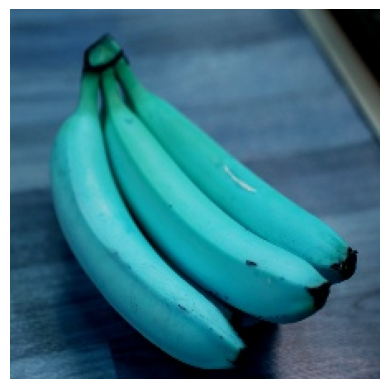

In [7]:
train_path = "../content/GroceryStoreDataset/dataset/train"
test_path = "../content/GroceryStoreDataset/dataset/test"
# a sample apple braeburn image

img = load_img(train_path + "/Fruit/Banana/Banana_050.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [8]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(224, 224, 3)

In [16]:
# Assuming you have defined 'train_path' somewhere in your code
train_path = "/content/GroceryStoreDataset/dataset/train"  # Replace with the actual path

classNames = glob.glob(train_path + "/*")
numberOfClasses = len(classNames)
print("The number of classes:", numberOfClasses)

The number of classes: 3


In [19]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))  # Correção: Adicionei o parêntese que faltava
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))  # Correção: Adicionei o parêntese que faltava
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(numberOfClasses))  # Camada de saída
model.add(Activation("softmax"))


In [20]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [21]:
batch_size = 32

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")


Found 2645 images belonging to 3 classes.
Found 2485 images belonging to 3 classes.


In [23]:
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 30,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

<ipython-input-23-b799a711a984>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/30
50/50 [==============================] - 339s 7s/step - loss: 1.0881 - accuracy: 0.5274 - val_loss: 0.8914 - val_accuracy: 0.6200
Epoch 2/30
50/50 [==============================] - 333s 7s/step - loss: 0.7444 - accuracy: 0.6671 - val_loss: 0.6902 - val_accuracy: 0.6913
Epoch 3/30
50/50 [==============================] - 336s 7s/step - loss: 0.7132 - accuracy: 0.6790 - val_loss: 0.7257 - val_accuracy: 0.6913
Epoch 4/30
50/50 [==============================] - 336s 7s/step - loss: 0.6611 - accuracy: 0.7194 - val_loss: 0.5742 - val_accuracy: 0.7362
Epoch 5/30
50/50 [==============================] - 331s 7s/step - loss: 0.6233 - accuracy: 0.7375 - val_loss: 0.5619 - val_accuracy: 0.7212
Epoch 6/30
50/50 [==============================] - 333s 7s/step - loss: 0.5765 - accuracy: 0.7634 - val_loss: 0.4821 - val_accuracy: 0.7925
Epoch 7/30
50/50 [==============================] - 334s 7s/step - loss: 0.5352 - accuracy: 0.7797 - val_loss: 0.5057 - val_accuracy: 0.7650
Epoch 8/30
50

In [24]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")

    import json
    with open(fileName + ".json", "w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding="utf-8") as f:
        h = json.loads(f.read())

    return h

# Descomente estas linhas para salvar e carregar o modelo
save_model("/content/test")
h = load_json("/content/test")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


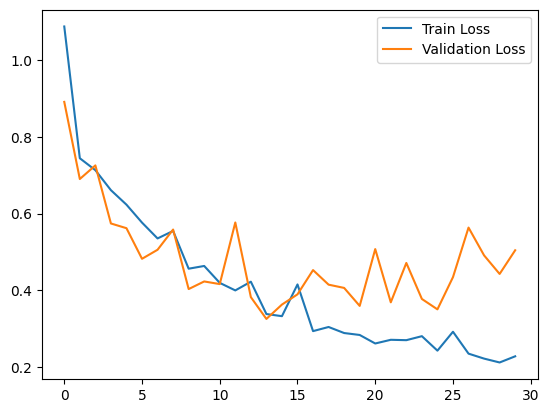

In [25]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

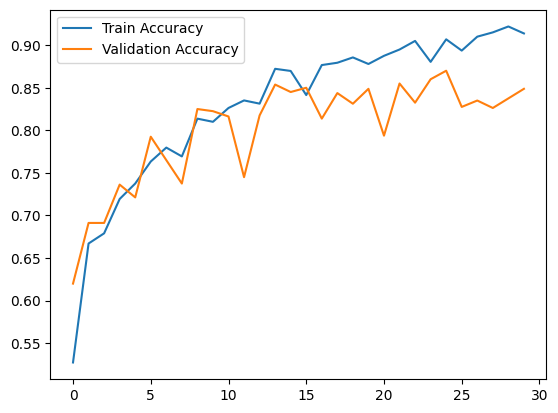

In [26]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

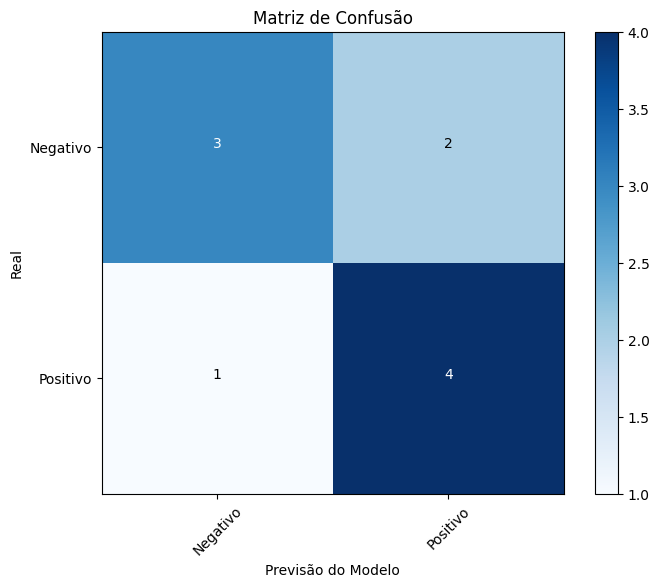

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Suponha que você tenha obtido as previsões do modelo e as verdadeiras labels do conjunto de teste
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # Labels reais
y_pred = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])  # Previsões do modelo

# Calcula a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negativo", "Positivo"], rotation=45)
plt.yticks(tick_marks, ["Negativo", "Positivo"])

# Anota as células com os valores da matriz de confusão
thresh = confusion.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{confusion[i, j]}", horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.xlabel("Previsão do Modelo")
plt.ylabel("Real")

# Mostra a matriz de confusão
plt.show()

In [29]:
import json

# Carregue o arquivo JSON
with open('/content/test.json', 'r') as json_file:
    data = json.load(json_file)

# Acesse os rótulos
rótulos = data

# Agora, a variável 'rótulos' contém os dados do JSON
print(rótulos)

{'loss': [1.0881208181381226, 0.7443751096725464, 0.7132424712181091, 0.6611197590827942, 0.6232956647872925, 0.5764960646629333, 0.535187840461731, 0.5547422170639038, 0.4562649130821228, 0.46337372064590454, 0.41928043961524963, 0.39960384368896484, 0.42233937978744507, 0.3380028307437897, 0.3324204981327057, 0.41518744826316833, 0.2934114336967468, 0.3041982054710388, 0.2884342670440674, 0.28337588906288147, 0.26115167140960693, 0.2707808315753937, 0.26979702711105347, 0.28021708130836487, 0.24247096478939056, 0.291764497756958, 0.2346578985452652, 0.2217104136943817, 0.21161401271820068, 0.22770042717456818], 'accuracy': [0.5273756980895996, 0.6670862436294556, 0.6790434122085571, 0.7193750143051147, 0.737500011920929, 0.7633731961250305, 0.7797356843948364, 0.7693750262260437, 0.8137193322181702, 0.8100000023841858, 0.8262500166893005, 0.835116446018219, 0.831340491771698, 0.8722466826438904, 0.8697293996810913, 0.8414096832275391, 0.8766520023345947, 0.8793749809265137, 0.8856250

In [30]:
from sklearn.metrics import confusion_matrix

# Suponha que você tenha as previsões do modelo (y_pred) e os rótulos verdadeiros do conjunto de validação (y_true)
confusion = confusion_matrix(y_true, y_pred)

# Exibe a matriz de confusão
print("Matriz de Confusão:")
print(confusion)

Matriz de Confusão:
[[3 2]
 [1 4]]


In [31]:
# Definir os valores de TP, FP, FN, TN
TP = 4
FP = 2
FN = 1
TN = 3

# Calcular Precisão
precision = TP / (TP + FP)

# Calcular Recall
recall = TP / (TP + FN)

# Calcular F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calcular Acurácia
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calcular Especificidade
specificity = TN / (TN + FP)

# Imprimir os resultados
print(f'Precisão (Precision): {precision:.2f}')
print(f'Recall (Revocação): {recall:.2f}')
print(f'F1-Score: {f1_score:.2f}')
print(f'Acurácia (Accuracy): {accuracy:.2f}')
print(f'Especificidade (Specificity): {specificity:.2f}')

Precisão (Precision): 0.67
Recall (Revocação): 0.80
F1-Score: 0.73
Acurácia (Accuracy): 0.70
Especificidade (Specificity): 0.60
